In [81]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [82]:
#%matplotlib inline
from __future__ import division
import matplotlib
import numpy as np
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import h5py
import os
import re
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4)})
plotStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0}
stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
np.seterr(divide='ignore',invalid='ignore')
from matplotlib import pyplot
from matplotlib.colors import LogNorm
pass

In [83]:
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [84]:
# Directory work

In [85]:
%%bash
pwd

/home/bciezah1/Documents/scripts


In [86]:
# Functions

In [87]:
# Setup plot styles for saving figures.
def figure_style():
    global plotStyles,stepStyles,plotColors,plotSymbols
    matplotlib.rcParams.update({"axes.formatter.limits": (-8,8), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'sans-serif','font.sans-serif':'Helvetica','font.size': 9, "axes.titlesize": 10, "xtick.labelsize": 8, "ytick.labelsize": 8,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
    plotStyles={"markersize":4,"markeredgewidth":1.0,"linewidth":1.0,"markerfacecolor":None}
    stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
    plotColors=plt.rcParams['axes.prop_cycle'].by_key()['color']
    plotSymbols=['x','o','^']

In [88]:
# Setup plot styles for on-screen plotting.
def screen_style(fontSize=20):
    global plotStyles,stepStyles,plotColors,plotSymbols
    matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'sans-serif','font.sans-serif':'Helvetica','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
    plotStyles={"markersize":12,"markeredgewidth":3.0,"linewidth":3.0}
    stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
    plotColors=plt.rcParams['axes.prop_cycle'].by_key()['color']
    plotSymbols=['x','o','^']

In [89]:
# Setup plot styles for saving figures.
def movie_style(multiplier):
    global plotStyles,stepStyles,plotColors,plotSymbols
    matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'sans-serif','font.sans-serif':'Helvetica','font.size': multiplier*6, "axes.titlesize": multiplier*7, "xtick.labelsize": multiplier*5, "ytick.labelsize": multiplier*5,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
    plotStyles={"markersize":4,"markeredgewidth":1.0,"linewidth":1.0}
    stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
    plotColors=plt.rcParams['axes.prop_cycle'].by_key()['color']
    plotSymbols=['x','o','^'] 

In [90]:
# define some project specific functions

In [91]:
import scipy.optimize as opt
import scipy.integrate as integrate
screen_style()
pass

In [92]:
from matplotlib.backends.backend_pdf import PdfPages
figuredir = "figures"
if not os.path.exists(figuredir): os.mkdir(figuredir)

# Cluster Interaction

## With Nucleation

### first option

In [13]:
dir3="/media/Data/MARCC/Cluster_Interaction/30x30_4lat_50_nuc_200traj/"

In [14]:
# File names #
filename0 =dir3+"mynew1.lm"
filename1 =dir3+"mynew2.lm"
filename2 =dir3+"mynew3.lm"
# Reading files #
fp0 = h5py.File(filename0, "r")
fp1 = h5py.File(filename1, "r")
fp2 = h5py.File(filename2, "r")
# replicates #
replicate=len(fp1["/Simulations"].keys()) #Number of replicates
times = len(np.array(fp0["/Simulations/%07d/SpeciesCountTimes"%replicate], dtype=double))
print("times",times)
print("replicate",replicate)
print("ready")

times 201
replicate 200
ready


In [15]:
 #Average Equilibrium#
CountEqui=np.zeros((times+1,replicate,3), dtype=int) 
lattices=fp0["/Simulations/%07d/Lattice"%replicate].keys()
#CountStep=-1
for replicate in range(1,replicate+1): 
    CountStep=-1
    for lattice in lattices:
        CountStep=CountStep+1
        #print(lattice)
        lfull = np.array(fp0["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
        CountEqui[CountStep][replicate-1][0]=float(np.sum(lfull[2:13][:,9:20]==1))
        CountEqui[CountStep][replicate-1][1]=float(np.sum(lfull[17:28][:,2:13]==1))
        CountEqui[CountStep][replicate-1][2]=float(np.sum(lfull[13:24][:,16:27]==1))
AverageCountEqui=np.mean(CountEqui,axis=1)
VarianceCountEqui=np.std(CountEqui,axis=1)/sqrt(200)
print("ready")

ready


In [16]:
#Average Production#
CountProd=np.zeros((times,replicate,3), dtype=int) 
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
#CountStep=-1
for replicate in range(1,replicate+1): 
    CountStep=-1
    for lattice in lattices:
        CountStep=CountStep+1
        #print(lattice)
        lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
        CountProd[CountStep][replicate-1][0]=float(np.sum(lfull[2:13][:,9:20]==1))
        CountProd[CountStep][replicate-1][1]=float(np.sum(lfull[17:28][:,2:13]==1))
        CountProd[CountStep][replicate-1][2]=float(np.sum(lfull[13:24][:,16:27]==1))
AverageCountProd1=np.mean(CountProd,axis=1)
VarianceCountProd1=np.std(CountProd,axis=1)/sqrt(200)
print("ready")

ready


In [17]:
#Third Nucleation#
CountProd=np.zeros((times,replicate,3), dtype=int) 
lattices=fp2["/Simulations/%07d/Lattice"%replicate].keys()
#CountStep=-1
for replicate in range(1,replicate+1): 
    CountStep=-1
    for lattice in lattices:
        CountStep=CountStep+1
        #print(lattice)
        lfull = np.array(fp2["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
        CountProd[CountStep][replicate-1][0]=float(np.sum(lfull[2:13][:,9:20]==1))
        CountProd[CountStep][replicate-1][1]=float(np.sum(lfull[17:28][:,2:13]==1))
        CountProd[CountStep][replicate-1][2]=float(np.sum(lfull[13:24][:,16:27]==1))
AverageCountProd2=np.mean(CountProd,axis=1)
VarianceCountProd2=np.std(CountProd,axis=1)/sqrt(200)
print("ready")

ready


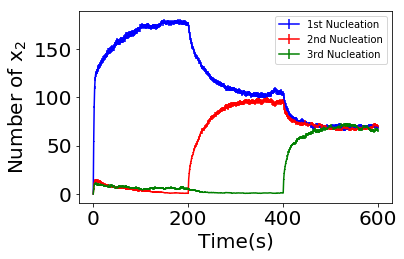

In [44]:
counting=np.concatenate((AverageCountEqui[0:200], AverageCountProd1[0:200],AverageCountProd2[0:200]), axis=0)
myerror=np.concatenate((VarianceCountEqui[0:200], VarianceCountProd1[0:200],VarianceCountProd2[0:200]), axis=0)
[nrow,ncol]=counting.shape
Xaxis = np.arange(1, nrow+1, 1)
errorbar(Xaxis,counting[:,0],myerror[:,0],label="1st Nucleation" , color='blue')
errorbar(Xaxis,counting[:,1],myerror[:,1],label="2nd Nucleation" , color='red')
errorbar(Xaxis,counting[:,2],myerror[:,2],label="3rd Nucleation" , color='green')
ylabel('Number of $\mathregular{x_{2}}$')
legend(loc="upper right", ncol=1, fontsize=10)
xlabel("Time(s)")
tight_layout()

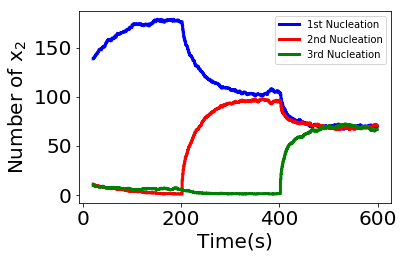

In [45]:
counting=np.concatenate((AverageCountEqui[0:200], AverageCountProd1[0:200],AverageCountProd2[0:200]), axis=0)
myerror=np.concatenate((VarianceCountEqui[0:200], VarianceCountProd1[0:200],VarianceCountProd2[0:200]), axis=0)
[nrow,ncol]=counting.shape
Xaxis = np.arange(1, nrow, 1)
for i in range(1,2):
    step(Xaxis[20:nrow-1],counting[:,0][20:nrow-1],label="1st Nucleation" , color='blue',**stepStyles)
    step(Xaxis[20:nrow-1],counting[:,1][20:nrow-1],label="2nd Nucleation" , color='red',**stepStyles)
    step(Xaxis[20:nrow-1],counting[:,2][20:nrow-1],label="3rd Nucleation" , color='green',**stepStyles)
pass
ylabel('Number of $\mathregular{x_{2}}$')
legend(loc="upper right", ncol=1, fontsize=10)
xlabel("Time(s)")
tight_layout()

# Spatial Resolution - Nucleation

In [46]:
dir3="/media/Data/MARCC/Cluster_Interaction/30x30_4lat_50_nuc_200traj/"
N2=[1]

/media/Data/MARCC/Cluster_Interaction/30x30_4lat_50_nuc_200traj/mynew3.lm
ready


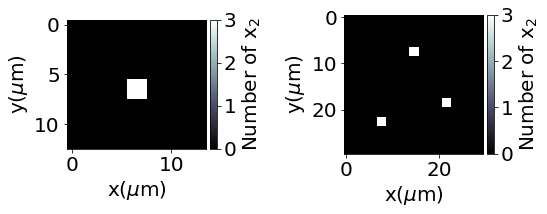

In [47]:
for x1 in N2:
    filename1 =dir3+"mynew3.lm"
    print(filename1)
    fp1 = h5py.File(filename1, "r")
    replicate=1
    lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
    startTimestep=0
    #endTimestep=len(times1)
    count=0
    fig = plt.figure(figsize=(8,24))
    for lattice in lattices:
        if  199<int(lattice)<201: #Take lattices each jump steps
            for replicate in range(1,2):
                ax5=plt.subplot(1, 2, 1)
                lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
                SumParticlesX2=np.sum(lfull[12:25][:,15:29]==2,axis=3) #Count Particles of Type X1
                TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
                m=ax5.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=3,cmap=cm.bone);
                plt.ylabel('y($\mu$m)',fontsize=20);plt.xlabel('x($\mu$m)',fontsize=20)
                divider = make_axes_locatable(ax5)
                cax = divider.append_axes("right", size="5%", pad=0.05)
                v=linspace(0,5,6,endpoint=True)
                plt.colorbar(m,ticks=v, cax=cax)
                plt.ylabel('Number of $\mathregular{x_{2}}$',fontsize=20)
                ax6=plt.subplot(1, 2, 2)
                lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
                SumParticlesX2=np.sum(lfull==2,axis=3) #Count Particles of Type X1
                TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
                m=ax6.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=3,cmap=cm.bone);
                plt.ylabel('y($\mu$m)',fontsize=20);plt.xlabel('x($\mu$m)',fontsize=20)
                divider = make_axes_locatable(ax6)
                cax = divider.append_axes("right", size="5%", pad=0.05)
                v=linspace(0,5,6,endpoint=True)
                plt.colorbar(m,ticks=v, cax=cax)
                plt.ylabel('Number of $\mathregular{x_{2}}$',fontsize=20)
                tight_layout()
            plt.savefig('img%s.png'%(int(int(lattice)/1)))
print("ready")

### first option

In [248]:
fig = plt.figure(figsize=(8,24))
gs = gridspec.GridSpec(nrows=6,ncols=2,figure=fig, width_ratios= [1.5,1.5],\
                       height_ratios=[1,1,1,1.5,1.5,1.5], wspace=0.6,hspace=0.8)
#########################
ax2 = fig.add_subplot(gs[3:4, 0:2]) #b

counting=np.concatenate((AverageCountProd1[0:2000],AverageCountProd2[0:2000],AverageCountProd3[0:2000]), axis=0)
#myerror=np.concatenate((VarianceCountEqui[0:200], VarianceCountProd1[0:200],VarianceCountProd2[0:200]), axis=0)
[nrow,ncol]=counting.shape
Xaxis = np.arange(2000, nrow+2000, 1)
for i in range(1,2):
    step(Xaxis[0:5999],counting[:,0][0:5999],label="1st Nucleation" , color='blue',**stepStyles)
    step(Xaxis[2000:5999],counting[:,1][2000:5999],label="2nd Nucleation" , color='red',**stepStyles)
    step(Xaxis[4000:5999],counting[:,2][4000:5999],label="3rd Nucleation" , color='green',**stepStyles)
pass
ylim([0,1000])
xlim([0,8000])
ylabel('Number of $\mathregular{x_{2}}$')
legend(loc="upper right", ncol=1, fontsize=10)
xlabel("Time(s)")
plt.grid(True)
tight_layout()
#tight_layout()
#sns.reset_orig()

ax3 = fig.add_subplot(gs[4:5, 0:1]) #b

dir1='/media/Data/MARCC/Cluster_Interaction/phase_space/k1_1.000e-10_and_k3_3.594e-09/nuc1/'
filename1 =dir1+"87.lm"
fp1 = h5py.File(filename1, "r")
################
replicate=1 #162#135#92#66 #65 56 36 #27
################
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[2000]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('Time=4000s', fontsize=20)
m=ax3.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y($\mu$m)',fontsize=20);plt.xlabel('x($\mu$m)',fontsize=20)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.05)
v=linspace(0,5,6,endpoint=True)
plt.colorbar(m,ticks=v, cax=cax)
plt.ylabel('Number of $\mathregular{x_{2}}$',fontsize=20)
#tight_layout()

ax4 = fig.add_subplot(gs[4:5, 1:2]) #b

dir2='/media/Data/MARCC/Cluster_Interaction/phase_space/k1_1.000e-10_and_k3_3.594e-09/nuc2/'
filename1 =dir2+"287.lm"
fp1 = h5py.File(filename1, "r")
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[1]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('Time=4001s', fontsize=20)
m=ax4.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y($\mu$m)',fontsize=20);plt.xlabel('x($\mu$m)',fontsize=20)
divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", size="5%", pad=0.05)
v=linspace(0,5,6,endpoint=True)
plt.colorbar(m,ticks=v, cax=cax)
plt.ylabel('Number of $\mathregular{x_{2}}$',fontsize=20)
#tight_layout()

ax5 = fig.add_subplot(gs[5:6, 0:1]) #b

dir3='/media/Data/MARCC/Cluster_Interaction/phase_space/k1_1.000e-10_and_k3_3.594e-09/nuc3/'
filename1 =dir3+"30.lm"
fp1 = h5py.File(filename1, "r")
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[1]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('Time=6001s', fontsize=20)
m=ax5.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y($\mu$m)',fontsize=20);plt.xlabel('x($\mu$m)',fontsize=20)
divider = make_axes_locatable(ax5)
cax = divider.append_axes("right", size="5%", pad=0.05)
v=linspace(0,5,6,endpoint=True)
plt.colorbar(m,ticks=v, cax=cax)
plt.ylabel('Number of $\mathregular{x_{2}}$',fontsize=20)
#tight_layout()

ax6 = fig.add_subplot(gs[5:6, 1:2]) #b

dir3='/media/Data/MARCC/Cluster_Interaction/phase_space/k1_1.000e-10_and_k3_3.594e-09/nuc3/'
filename1 =dir3+"14.lm"
fp1 = h5py.File(filename1, "r")
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('Time=8000s', fontsize=20)
m=ax6.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y($\mu$m)',fontsize=20);plt.xlabel('x($\mu$m)',fontsize=20)
divider = make_axes_locatable(ax6)
cax = divider.append_axes("right", size="5%", pad=0.05)
v=linspace(0,5,6,endpoint=True)
plt.colorbar(m,ticks=v, cax=cax)
plt.ylabel('Number of $\mathregular{x_{2}}$',fontsize=20)
#tight_layout()

#figtext(0.055,0.900,"a", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
#figtext(0.055,0.690,"b", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
figtext(0.055,0.550,"a", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
figtext(0.055,0.390,"b", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
figtext(0.530,0.390,"c", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
figtext(0.055,0.245,"d", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
figtext(0.530,0.245,"e", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
ax4.plot(24,64,'o',ms=12,mec='b',mfc='none',mew=2)
ax5.plot(65,64,'o',ms=12,mec='b',mfc='none',mew=2)
#ax4.annotate(' ',color='red',xy=(23,64),xytext=(18,64),fontsize=5,arrowprops=dict(width=5,headwidth=8,shrink=0.5,linewidth=1,facecolor='red'))
#ax5.annotate('',color='red',xy=(65,64),xytext=(70,64),fontsize=5,arrowprops=dict(width=5,headwidth=8,shrink=0.5,linewidth=1,facecolor='red'))

ax2.annotate('b,c',color='black',xy=(4000,550),xytext=(4100,720),fontsize=10,arrowprops=dict(width=1,headwidth=10,shrink=1,linewidth=1,color='black'))
ax2.annotate('d',color='black',xy=(6000,430),xytext=(6100,600),fontsize=10,arrowprops=dict(width=1,headwidth=10,shrink=0.05,linewidth=1,color='black'))
ax2.annotate('e',color='black',xy=(7750,350),xytext=(7850,520),fontsize=10,arrowprops=dict(width=1,headwidth=10,shrink=0.05,linewidth=1,color='black'))
plt.savefig('Cluster_Interaction_f6_v1.png,bbox_inches='tight')

SyntaxError: invalid syntax (<ipython-input-248-c6cc5db995cd>, line 120)

### second option

### third option

### second option 

NameError: name 'temp2' is not defined

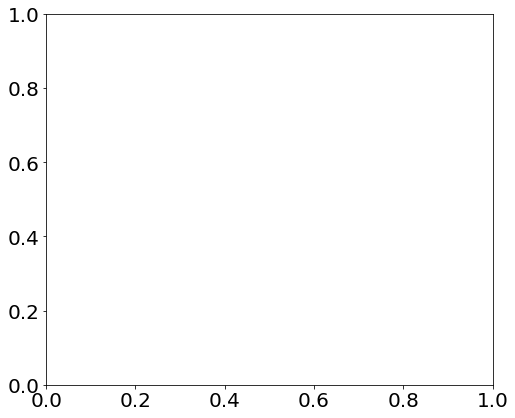

In [123]:
fig = plt.figure(figsize=(8,24))
gs = gridspec.GridSpec(nrows=6,ncols=2,figure=fig, width_ratios= [1,1],height_ratios=[1,1,1,1,1,1], wspace=0.6,hspace=0.7)
#########################
ax1 = fig.add_subplot(gs[0:2, 0:2]) #a
#sns.reset_orig()
#sns.set()
#m = ax1.imshow(np.flip(np.average(temp1[:,:,1:5],axis=2),0),cmap = 'jet',vmin=26, vmax=38.28,interpolation='bicubic')
#newmatrix=log(-1*(np.flip(np.average(temp2[:,:,1:2],axis=2),0)-np.max(np.average(temp1[:,:,1:6],axis=2))))

#newmatrix=log(-1*(np.flip(np.average(temp2[:,:,1:4],axis=2),0)-38.271))
#newmatrix[newmatrix<-5]=-5
m = ax1.imshow(np.flip(np.average(temp2[:,:,1:4],axis=2),0),cmap = 'jet',interpolation="lanczos",vmin=38,vmax=38.27)
#m = ax1.imshow(np.flip(np.average(temp1[:,:,1:6],axis=2),0),cmap = 'jet',vmin=37, vmax=38.28)
y_label_list=[seq[0],seq[10],seq[20],seq[30],seq[40],seq[49]] # choose sampled points to show in the axis
ax1.set_yticks([49,40,30,20,10,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=15)
x_label_list=[seq[0],seq[10],seq[20],seq[30],seq[40],seq[49]]
ax1.set_xticks([0,10,20,30,40,49])
ax1.set_xticklabels(x_label_list,fontsize=15)
plt.ylabel('$\mathregular{k_1}$ (s${^{-1}}$)',fontsize=30)
plt.xlabel('$\mathregular{k_3}$ (s${^{-1}}$)',fontsize=30)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=15)
plt.ylabel('<$\phi$>',fontsize=30)
#plt.ylabel('<$\phi$>',rotation='horizontal')
#figtext(0.450,0.860,"b",{'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'},color='w')
#figtext(0.450,0.785,"c", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'},color='w')
#figtext(0.450,0.740,"d", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'},color='w')
#figtext(0.450,0.700,"e", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'},color='w')
#tight_layout()
####################################
#sns.set()
ax2 = fig.add_subplot(gs[2:3, 0:2]) #b
NumberNucSites = np.linspace(0,201,201)
avephi=np.average(flip(PhaseMatrixBOB),axis=2)
myphierror=np.std(flip(PhaseMatrixBOB),axis=2)
plot(NumberNucSites,avephi,'or',linewidth=5,label="30x30")
legend(loc="upper right")
plot(NumberNucSites,avephi,color='black',linewidth=1)
errorbar(NumberNucSites,avephi,myphierror,uplims=False,lolims=False,color='blue')
ylim([9,12])
#xlim([0,50])
plt.grid(True)
ylabel('<$\phi$>',fontsize=30);
xlabel("# Nucleation Sites",fontsize=25)
#tight_layout()
plt.savefig('phase_separation_100x100_with_nuc_examples_fig5_v3.pdf',bbox_inches='tight')

# 100x100

In [6]:
dir="/media/Data/MARCC/Cluster_Interaction/output_nuc2_long/"

In [24]:
# File names #
filename1 = dir+"k1_5.995e-10_and_k3_3.594e-09_100x100_nuc2_prod.lm" # the best!!
# Reading files #
fp1 = h5py.File(filename1, "r")
# replicates #
replicate=len(fp1["/Simulations"].keys()) #Number of replicates
times = len(np.array(fp1["/Simulations/%07d/SpeciesCountTimes"%replicate], dtype=double))
print("times",times)
print("replicate",replicate)
print("ready")

times 951
replicate 2
ready


In [25]:
radius=5

In [26]:
#Average Production#
CountProd=np.zeros((times,replicate,3), dtype=int) 
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
#CountStep=-1
for replicate in range(1,replicate+1): 
    CountStep=-1
    for lattice in lattices:
        CountStep=CountStep+1
        #print(lattice)
        lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
        CountProd[CountStep][replicate-1][0]=float(np.sum(lfull[24-radius:27+radius][:,49-radius:52+radius]==1))
        CountProd[CountStep][replicate-1][1]=float(np.sum(lfull[64-radius:67+radius][:,24-radius:27+radius]==1))
        CountProd[CountStep][replicate-1][2]=float(np.sum(lfull[13:24][:,16:27]==1))
AverageCountProd1=np.mean(CountProd,axis=1)
#VarianceCountProd1=np.std(CountProd,axis=1)/sqrt(200)
print("ready")

ready


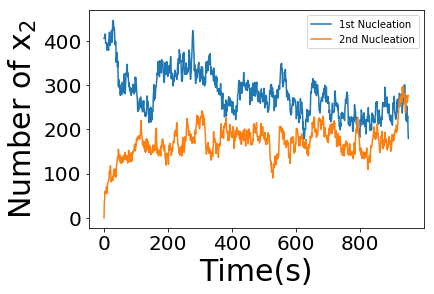

In [27]:
plot(AverageCountProd1[:,0],label="1st Nucleation")
plot(AverageCountProd1[:,1],label="2nd Nucleation")
ylabel('Number of $\mathregular{x_{2}}$',fontsize=30);xlabel("Time(s)",fontsize=30);
legend(loc="upper right", ncol=1, fontsize=10)
xticks(fontsize=20);yticks(fontsize=20)
plt.savefig('k1_5.995e-10_and_k3_3.594e-09_100x100_100x100.pdf',bbox_inches='tight')

# 100x100 - 3 nucleation

In [79]:
dir1='/media/Data/MARCC/Cluster_Interaction/phase_space/100x100/20rep/nuc1/'
dir2='/media/Data/MARCC/Cluster_Interaction/phase_space/100x100/20rep/nuc2/'
dir3='/media/Data/MARCC/Cluster_Interaction/phase_space/100x100/20rep/nuc3/'

In [80]:
# File names #
filename1 =dir1+"k1_5.995e-10_and_k3_3.594e-09_100x100_nuc1_prod.lm"
filename2 =dir2+"k1_5.995e-10_and_k3_3.594e-09_100x100_nuc2_prod.lm"
filename3 =dir3+"k1_5.995e-10_and_k3_3.594e-09_100x100_nuc3_prod.lm"
# Reading files #
fp1 = h5py.File(filename1, "r")
fp2 = h5py.File(filename2, "r")
fp3 = h5py.File(filename3, "r")
# replicates #
replicate=len(fp1["/Simulations"].keys()) #Number of replicates
times = len(np.array(fp2["/Simulations/%07d/SpeciesCountTimes"%replicate], dtype=double))
print("times",times)
print("replicate",replicate)
print("ready")

times 1001
replicate 20
ready


In [213]:
radius=2

In [214]:
#First Nucleation#
CountProd1=np.zeros((times,replicate,3), dtype=int) 
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
#CountStep=-1
for replicate in range(1,replicate+1): 
    CountStep=-1
    for lattice in lattices:
        CountStep=CountStep+1
        #print(lattice)
        lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
        CountProd1[CountStep][replicate-1][0]=float(np.sum(lfull[24-radius:27+radius][:,49-radius:52+radius]==1))
        CountProd1[CountStep][replicate-1][1]=float(np.sum(lfull[64-radius:67+radius][:,24-radius:27+radius]==1))
        CountProd1[CountStep][replicate-1][2]=float(np.sum(lfull[64-radius:67+radius][:,64-radius:67+radius]==1))
AverageCountProd1=np.mean(CountProd1,axis=1)
#VarianceCountProd1=np.std(CountProd,axis=1)/sqrt(200)
print("ready")

ready


In [215]:
#Second Nucleation#
CountProd2=np.zeros((times,replicate,3), dtype=int) 
lattices=fp2["/Simulations/%07d/Lattice"%replicate].keys()
#CountStep=-1
for replicate in range(1,replicate+1): 
    CountStep=-1
    for lattice in lattices:
        CountStep=CountStep+1
        #print(lattice)
        lfull = np.array(fp2["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
        CountProd2[CountStep][replicate-1][0]=float(np.sum(lfull[24-radius:27+radius][:,49-radius:52+radius]==1))
        CountProd2[CountStep][replicate-1][1]=float(np.sum(lfull[64-radius:67+radius][:,24-radius:27+radius]==1))
        CountProd2[CountStep][replicate-1][2]=float(np.sum(lfull[64-radius:67+radius][:,64-radius:67+radius]==1))
AverageCountProd2=np.mean(CountProd2,axis=1)
#VarianceCountProd2=np.std(CountProd,axis=1)/sqrt(200)
print("ready")

ready


In [216]:
#Third Nucleation#
CountProd3=np.zeros((times,replicate,3), dtype=int) 
lattices=fp3["/Simulations/%07d/Lattice"%replicate].keys()
#CountStep=-1
for replicate in range(1,replicate+1): 
    CountStep=-1
    for lattice in lattices:
        CountStep=CountStep+1
        #print(lattice)
        lfull = np.array(fp3["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
        CountProd3[CountStep][replicate-1][0]=float(np.sum(lfull[24-radius:27+radius][:,49-radius:52+radius]==1))
        CountProd3[CountStep][replicate-1][1]=float(np.sum(lfull[64-radius:67+radius][:,24-radius:27+radius]==1))
        CountProd3[CountStep][replicate-1][2]=float(np.sum(lfull[64-radius:67+radius][:,64-radius:67+radius]==1))
AverageCountProd3=np.mean(CountProd3,axis=1)
#VarianceCountProd2=np.std(CountProd,axis=1)/sqrt(200)
print("ready")

ready


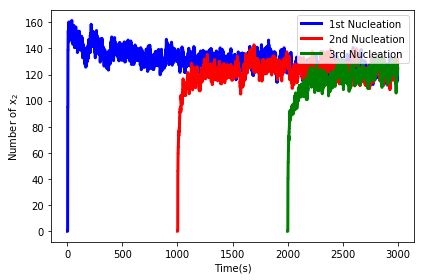

In [217]:
counting=np.concatenate((AverageCountProd1[0:1000],AverageCountProd2[0:1000],AverageCountProd3[0:1000]), axis=0)
#myerror=np.concatenate((VarianceCountEqui[0:200], VarianceCountProd1[0:200],VarianceCountProd2[0:200]), axis=0)
[nrow,ncol]=counting.shape
Xaxis = np.arange(1, nrow, 1)
for i in range(1,2):
    step(Xaxis[0:2999],counting[:,0][0:2999],label="1st Nucleation" , color='blue',**stepStyles)
    step(Xaxis[1000:2999],counting[:,1][1000:2999],label="2nd Nucleation" , color='red',**stepStyles)
    step(Xaxis[1999:2999],counting[:,2][1999:2999],label="3rd Nucleation" , color='green',**stepStyles)
pass
#xscale('log')
ylabel('Number of $\mathregular{x_{2}}$')
legend(loc="upper right", ncol=1, fontsize=10)
xlabel("Time(s)")
tight_layout()

In [46]:
counting[500:1000,1].shape

TypeError: 'int' object is not subscriptable

In [51]:
times=2000

## 50 replicates - MARCC ##

In [130]:
dir1="/media/Data/MARCC/Cluster_Interaction/phase_space/k1_1.000e-10_and_k3_3.594e-09/nuc1/"
dir2="/media/Data/MARCC/Cluster_Interaction/phase_space/k1_1.000e-10_and_k3_3.594e-09/nuc2/"
dir3="/media/Data/MARCC/Cluster_Interaction/phase_space/k1_1.000e-10_and_k3_3.594e-09/nuc3/"

In [131]:
radius=10

In [132]:
replicate=1 # This simulations contains just one replicate
N=np.linspace(1,492,492) # Number of simulations
#N=np.linspace(1,10,10)
CountProd1=np.zeros((times,len(N),3), dtype=int)  # Matrix to store the data
# File names #
for n in N:
    CountStep=-1 # allocate each simulation output into a specific column in the matrix CountProd1
    filename1 =dir1+"%0.1d.lm"%(n)
    #print(filename1)
    fp1 = h5py.File(filename1, "r")
    times = len(np.array(fp1["/Simulations/%07d/SpeciesCountTimes"%replicate], dtype=double))
    lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
    for lattice in lattices:
        CountStep=CountStep+1
        #lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
        lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
        CountProd1[CountStep][int(n-1)][0]=float(np.sum(lfull[24-radius:27+radius][:,49-radius:52+radius]==1))
        CountProd1[CountStep][int(n-1)][1]=float(np.sum(lfull[64-radius:67+radius][:,24-radius:27+radius]==1))
        CountProd1[CountStep][int(n-1)][2]=float(np.sum(lfull[64-radius:67+radius][:,64-radius:67+radius]==1))
AverageCountProd1=np.mean(CountProd1,axis=1)
print("ready")

ready


In [133]:
dir2="/media/Data/MARCC/Cluster_Interaction/phase_space/k1_1.000e-10_and_k3_3.594e-09/nuc2/"
replicate=1 # This simulations contains just one replicate
N=np.linspace(1,419,419) # Number of simulations
#N=np.linspace(1,50,50)
CountProd2=np.zeros((times,len(N),3), dtype=int)  # Matrix to store the data
# File names #
for n in N:
    CountStep=-1 # allocate each simulation output into a specific column in the matrix CountProd1
    filename1 =dir2+"%0.1d.lm"%(n)
    #print(filename1)
    fp1 = h5py.File(filename1, "r")
    times = len(np.array(fp1["/Simulations/%07d/SpeciesCountTimes"%replicate], dtype=double))
    lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
    for lattice in lattices:
        CountStep=CountStep+1
        #lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
        lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
        CountProd2[CountStep][int(n-1)][0]=float(np.sum(lfull[24-radius:27+radius][:,49-radius:52+radius]==1))
        CountProd2[CountStep][int(n-1)][1]=float(np.sum(lfull[64-radius:67+radius][:,24-radius:27+radius]==1))
        CountProd2[CountStep][int(n-1)][2]=float(np.sum(lfull[64-radius:67+radius][:,64-radius:67+radius]==1))
AverageCountProd2=np.mean(CountProd2,axis=1)
print("ready")

ready


In [134]:
dir3="/media/Data/MARCC/Cluster_Interaction/phase_space/k1_1.000e-10_and_k3_3.594e-09/nuc3/"
replicate=1 # This simulations contains just one replicate
N=np.linspace(1,351,351)
#N=np.linspace(1,50,50)
CountProd3=np.zeros((times,len(N),3), dtype=int)  # Matrix to store the data
# File names #
i=-1
for n in N:
    i=i+1
    CountStep=-1 # allocate each simulation output into a specific column in the matrix CountProd1
    #filename1 =dir3+"%0.1d_nuc3.lm"%(n)
    filename1 =dir3+"%0.1d.lm"%(n)
    #print(filename1)
    fp1 = h5py.File(filename1, "r")
    times = len(np.array(fp1["/Simulations/%07d/SpeciesCountTimes"%replicate], dtype=double))
    lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
    for lattice in lattices:
        CountStep=CountStep+1
        #lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
        lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
        CountProd3[CountStep][int(i-1)][0]=float(np.sum(lfull[24-radius:27+radius][:,49-radius:52+radius]==1))
        CountProd3[CountStep][int(i-1)][1]=float(np.sum(lfull[64-radius:67+radius][:,24-radius:27+radius]==1))
        CountProd3[CountStep][int(i-1)][2]=float(np.sum(lfull[64-radius:67+radius][:,64-radius:67+radius]==1))
AverageCountProd3=np.mean(CountProd3,axis=1)
print("ready")

ready


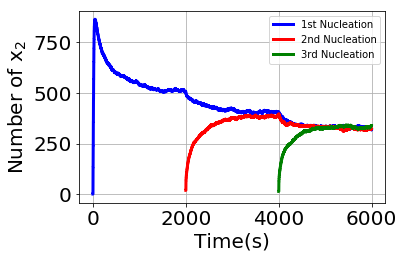

In [135]:
counting=np.concatenate((AverageCountProd1[0:2000],AverageCountProd2[0:2000],AverageCountProd3[0:2000]), axis=0)
#myerror=np.concatenate((VarianceCountEqui[0:200], VarianceCountProd1[0:200],VarianceCountProd2[0:200]), axis=0)
[nrow,ncol]=counting.shape
Xaxis = np.arange(1, nrow, 1)
for i in range(1,2):
    step(Xaxis[0:5999],counting[:,0][0:5999],label="1st Nucleation" , color='blue',**stepStyles)
    step(Xaxis[2000:5999],counting[:,1][2000:5999],label="2nd Nucleation" , color='red',**stepStyles)
    step(Xaxis[4000:5999],counting[:,2][4000:5999],label="3rd Nucleation" , color='green',**stepStyles)
pass
#ylim([0,1000])
ylabel('Number of $\mathregular{x_{2}}$')
legend(loc="upper right", ncol=1, fontsize=10)
xlabel("Time(s)")
plt.grid(True)
tight_layout()

In [610]:
Xaxis.shape

(3999,)

In [96]:
N2=np.linspace(100,199,100)
N2

array([100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 151., 152., 153., 154.,
       155., 156., 157., 158., 159., 160., 161., 162., 163., 164., 165.,
       166., 167., 168., 169., 170., 171., 172., 173., 174., 175., 176.,
       177., 178., 179., 180., 181., 182., 183., 184., 185., 186., 187.,
       188., 189., 190., 191., 192., 193., 194., 195., 196., 197., 198.,
       199.])

ready


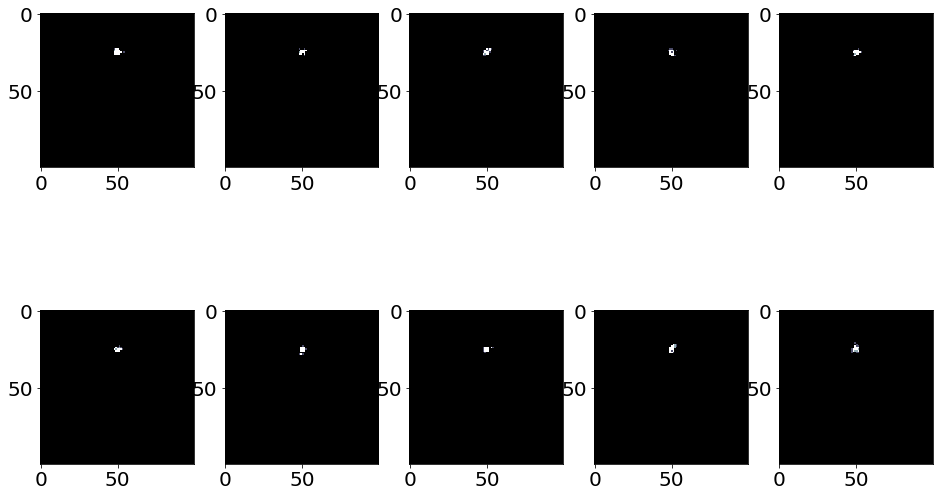

In [138]:
N1=[0]
#N2=np.linspace(201,300,100)
N2=[11,14,23,31,44,63,76,77,89,95]
dir='/media/Data/MARCC/Cluster_Interaction/phase_space/k1_1.000e-10_and_k3_3.594e-09/nuc1/'
counting=0
for x1 in N1:
    figure(figsize = (16,10));
    countsim=0
    for x2 in N2:
        countsim=countsim+1
        #name="30_nuc3.lm"
        name="%0.1d.lm"%(x2)
        filename1 =dir+name
        #print(filename1)
        fp1 = h5py.File(filename1, "r")
        replicate=1
        lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
        startTimestep=0
        #endTimestep=len(times1)
        count=0
        #print(lattices)
        lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[1]
        #figure(figsize = (12,6));
        lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
        SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
        TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
        subplot(2,5, countsim);
        #suptitle("k1_%0.3e_and_k1_%0.3e."%(x1,x2),fontsize=20)
        imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=3,cmap=cm.bone);
        #title("replicate "+str(replicate),fontsize=20);plt.xticks(fontsize=20);plt.yticks(fontsize=20) 
        #savefig("k1_%0.1e_and_k3_%0.1e.png"%(x1,x2))
print("ready")

dir='/media/Data/MARCC/Cluster_Interaction/phase_space/k1_1.000e-10_and_k3_3.594e-09/nuc2/'
filename1 =dir+"4.lm"
fp1 = h5py.File(filename1, "r")
################
replicate=1 #162#135#92#66 #65 56 36 #27
################
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[1]

In [ ]:
N1=[0]
N2=[11,14,23,31,44,63,76,77,89,95]
dir='/media/Data/MARCC/Cluster_Interaction/phase_space/k1_1.000e-10_and_k3_3.594e-09/nuc1/'
counting=0
for x1 in N1:
    figure(figsize = (16,10));
    countsim=0
    name="%0.1d.lm"%(1)
    filename1 =dir+name
    #print(filename1)
    fp1 = h5py.File(filename1, "r")
    lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
    for lattice in lattices:
        if int(lattice)%1==0:
            countsim=0
            for x2 in N2:
                countsim=countsim+1
                #name="30_nuc3.lm"
                name="%0.1d.lm"%(x2)
                filename1 =dir+name
                #print(filename1)
                fp1 = h5py.File(filename1, "r")
                replicate=1
                #lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
                startTimestep=0
                #endTimestep=len(times1)
                count=0
                #print(lattices)
                #lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys()
                #figure(figsize = (12,6));
                lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
                SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
                TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
                subplot(2,5, countsim);
                suptitle("Frame = %0.4s"%(int(lattice)),fontsize=20)
                imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
                #figtext(0.055,0.550,"a", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
                #title("replicate "+str(replicate),fontsize=20);plt.xticks(fontsize=20);plt.yticks(fontsize=20) 
            savefig("temp%0.4s.png"%(int(lattice)))
print("ready")

/media/Data/MARCC/Cluster_Interaction/phase_space/k1_1.000e-10_and_k3_3.594e-09/nuc1/10.lm 0 0


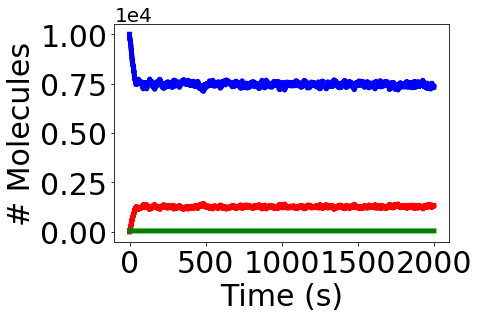

In [69]:
N1=[0]
N2=[0]
radius=10
for x1 in N1:
    for x2 in N2:
        dir='/media/Data/MARCC/Cluster_Interaction/phase_space/k1_1.000e-10_and_k3_3.594e-09/nuc1/'
        filename1 =dir+"10.lm"
        print(filename1,x1,x2)
        fp1 = h5py.File(filename1, "r")
        replicate=1
        counts=fp1["/Simulations/%07d/SpeciesCounts"%replicate]
        times1=fp1["/Simulations/%07d/SpeciesCountTimes"%replicate]
        #print(times1)
        startTimestep=0
        endTimestep=len(times1)
        for replicate in range(1,2):
            counts=fp1["/Simulations/%07d/SpeciesCounts"%replicate]
            times=fp1["/Simulations/%07d/SpeciesCountTimes"%replicate]
            step(times[startTimestep:endTimestep],counts[startTimestep:endTimestep,0],color='blue',linewidth=5)
            step(times[startTimestep:endTimestep],counts[startTimestep:endTimestep,1],color='red',linewidth=5)
            step(times[startTimestep:endTimestep],counts[startTimestep:endTimestep,2],color='green',linewidth=5)
        pass
xlabel('Time (s)',fontsize=30); ylabel('# Molecules',fontsize=30); 
plt.xticks(fontsize=30);plt.yticks(fontsize=30)
fp1=0

In [121]:
radius=24
dir1="/media/Data/MARCC/Cluster_Interaction/phase_space/k1_1.000e-10_and_k3_3.594e-09/nuc1/"
replicate=1 # This simulations contains just one replicate
N=np.linspace(1,10,10)
CountProd1=np.zeros((times,len(N),3), dtype=float)  # Matrix to store the data
# File names #
for n in N:
    CountStep=-1 # allocate each simulation output into a specific column in the matrix CountProd1
    filename1 =dir1+"%0.1d.lm"%(n)
    fp1 = h5py.File(filename1, "r")
    times = len(np.array(fp1["/Simulations/%07d/SpeciesCountTimes"%replicate], dtype=double))
    lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
    for lattice in lattices:
        CountStep=CountStep+1
        lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
        CountProd1[CountStep][int(n-1)][0]=float(np.sum(lfull[24-radius:27+radius][:,49-radius:52+radius]==1))
        #CountProd1[CountStep][int(n-1)][0]=float(np.sum(lfull[24-radius:27+radius][:,49-radius:52+radius]==1))
        #CountProd1[CountStep][int(n-1)][1]=float(np.sum(lfull[64-radius:67+radius][:,24-radius:27+radius]==1))
        #CountProd1[CountStep][int(n-1)][2]=float(np.sum(lfull[64-radius:67+radius][:,64-radius:67+radius]==1))
AverageCountProd1=np.mean(CountProd1,axis=1)
print("ready")

ready


(0, 1500)

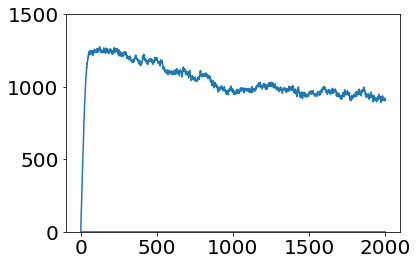

In [122]:
plot(np.mean(CountProd1,axis=1))
ylim([0,1500])

In [142]:
dir1="/media/Data/MARCC/Cluster_Interaction/phase_space/nuc1_krastan/"
radius=10

In [165]:
replicate=1 # This simulations contains just one replicate
N=np.linspace(1,40,40)# Number of simulations
#N=np.linspace(1,10,10)
CountProd1=np.zeros((times,len(N),3), dtype=int)  # Matrix to store the data
# File names #
for n in N:
    CountStep=-1 # allocate each simulation output into a specific column in the matrix CountProd1
    filename1 =dir1+"%0.1d.lm"%(n)
    #print(filename1)
    fp1 = h5py.File(filename1, "r")
    times = len(np.array(fp1["/Simulations/%07d/SpeciesCountTimes"%replicate], dtype=double))
    lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
    for lattice in lattices:
        CountStep=CountStep+1
        #lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
        lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
        CountProd1[CountStep][int(n-1)][0]=float(np.sum(lfull[24-radius:27+radius][:,49-radius:52+radius]==1))
        CountProd1[CountStep][int(n-1)][1]=float(np.sum(lfull[64-radius:67+radius][:,24-radius:27+radius]==1))
        CountProd1[CountStep][int(n-1)][2]=float(np.sum(lfull[64-radius:67+radius][:,64-radius:67+radius]==1))
AverageCountProd1=np.mean(CountProd1,axis=1)
print("ready")

ready


(0, 80)

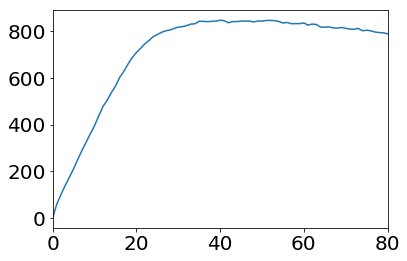

In [171]:
plot(np.mean(CountProd1,axis=1)[:,0])
xlim([0,80])

In [156]:
np.mean(CountProd1,axis=1)[:,0]

array([  0.   ,  60.3  , 100.825, ..., 522.65 , 517.275, 525.925])